In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [3]:
# DATA

# import

file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'test_weather_data.csv')
data = pd.read_csv(file_path)
data.head()


,index,time,airT,rainIntensity,rH,solarRadiance,windDir,windSpeed,pressure
0,1133,2020-11-05 12:15:00+00:00,10.9,0.0,76.4,111.4,233.0,1.13,99010.0
1,1134,2020-11-05 12:20:00+00:00,10.9,0.0,76.7,115.5,245.0,1.17,99010.0
2,1135,2020-11-05 12:25:00+00:00,11.0,0.0,75.5,117.2,243.0,1.64,99010.0
3,1136,2020-11-05 12:30:00+00:00,11.0,0.0,76.0,118.8,226.0,1.54,99000.0
4,1137,2020-11-05 12:35:00+00:00,11.0,0.0,74.2,120.4,221.0,1.90,99000.0


In [4]:
# rename columns to match the old format
new_data = data.rename(columns={
    'time': 'acquisition_timestamp',
    'airT': 'AMBIENT_TEMPERATURE',
    'rainIntensity': 'RAIN_INTENSITY',
    'rH': 'RELATIVE_HUMIDITY',
    'solarRadiance': 'SOLAR_RADIATION_INTENSITY',
    'windDir': 'WIND_DIRECTION',
    'windSpeed': 'WIND_SPEED',
    'pressure': 'AIR_PRESSURE'
})

# convert acquisition_timestamp to datetime
new_data['acquisition_timestamp'] = pd.to_datetime(new_data['acquisition_timestamp'], utc=True)

new_data = new_data.drop(columns=['index'])

# set the 'acquisition_timestamp' as the index
new_data = new_data.set_index('acquisition_timestamp')

# rearrange columns to match the old format
new_data = new_data[[
    'AIR_PRESSURE', 'AMBIENT_TEMPERATURE', 'RAIN_INTENSITY', 
    'RELATIVE_HUMIDITY', 'SOLAR_RADIATION_INTENSITY', 
    'WIND_DIRECTION', 'WIND_SPEED'
]]

new_data.head()


,AIR_PRESSURE,AMBIENT_TEMPERATURE,RAIN_INTENSITY,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_DIRECTION,WIND_SPEED
acquisition_timestamp,,,,,,,
2020-11-05 12:15:00+00:00,99010.0,10.9,0.0,76.4,111.4,233.0,1.13
2020-11-05 12:20:00+00:00,99010.0,10.9,0.0,76.7,115.5,245.0,1.17
2020-11-05 12:25:00+00:00,99010.0,11.0,0.0,75.5,117.2,243.0,1.64
2020-11-05 12:30:00+00:00,99000.0,11.0,0.0,76.0,118.8,226.0,1.54
2020-11-05 12:35:00+00:00,99000.0,11.0,0.0,74.2,120.4,221.0,1.90


In [5]:
#  solar_radiation_intensity
solar_radiation_intensity = new_data[['SOLAR_RADIATION_INTENSITY']]
print(solar_radiation_intensity)

# count the NaN values
nan_count_solar_radiation_intensity = solar_radiation_intensity['SOLAR_RADIATION_INTENSITY'].isna().sum()
print(f'Nan Count Temperature :',nan_count_solar_radiation_intensity)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=solar_radiation_intensity.index.min(), end=solar_radiation_intensity.index.max(), freq='5T')
missing_timestamps = complete_range.difference(solar_radiation_intensity.index)
print(f'Length of missing timestamps :',len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
print(f'Data Complete Range :',len(df_complete_range))
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
solar_radiation_intensity_incomplete = df_complete_range.merge(solar_radiation_intensity, left_index=True, right_index=True, how='left')
# print(solar_radiation_intensity_incomplete)
solar_radiation_intensity_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
solar_radiation_intensity_all = solar_radiation_intensity_incomplete.bfill()
print(f'Temperature all :',solar_radiation_intensity_all)
print(f'Sum of na Tempertaure all :',solar_radiation_intensity_all.isna().sum()) # okay

str(solar_radiation_intensity_all.index.dtype) # okay

                           SOLAR_RADIATION_INTENSITY
acquisition_timestamp                               
2020-11-05 12:15:00+00:00                      111.4
2020-11-05 12:20:00+00:00                      115.5
2020-11-05 12:25:00+00:00                      117.2
2020-11-05 12:30:00+00:00                      118.8
2020-11-05 12:35:00+00:00                      120.4
...                                              ...
2023-05-31 21:35:00+00:00                        0.0
2023-05-31 21:40:00+00:00                        0.0
2023-05-31 21:45:00+00:00                        0.0
2023-05-31 21:50:00+00:00                        0.0
2023-05-31 21:55:00+00:00                        0.0

[265803 rows x 1 columns]
Nan Count Temperature : 4
Length of missing timestamps : 4170
Data Complete Range : 269973
Temperature all :                            SOLAR_RADIATION_INTENSITY
2020-11-05 12:15:00+00:00                      111.4
2020-11-05 12:20:00+00:00                      115.5
2020-11-05 12:25

'datetime64[ns, UTC]'

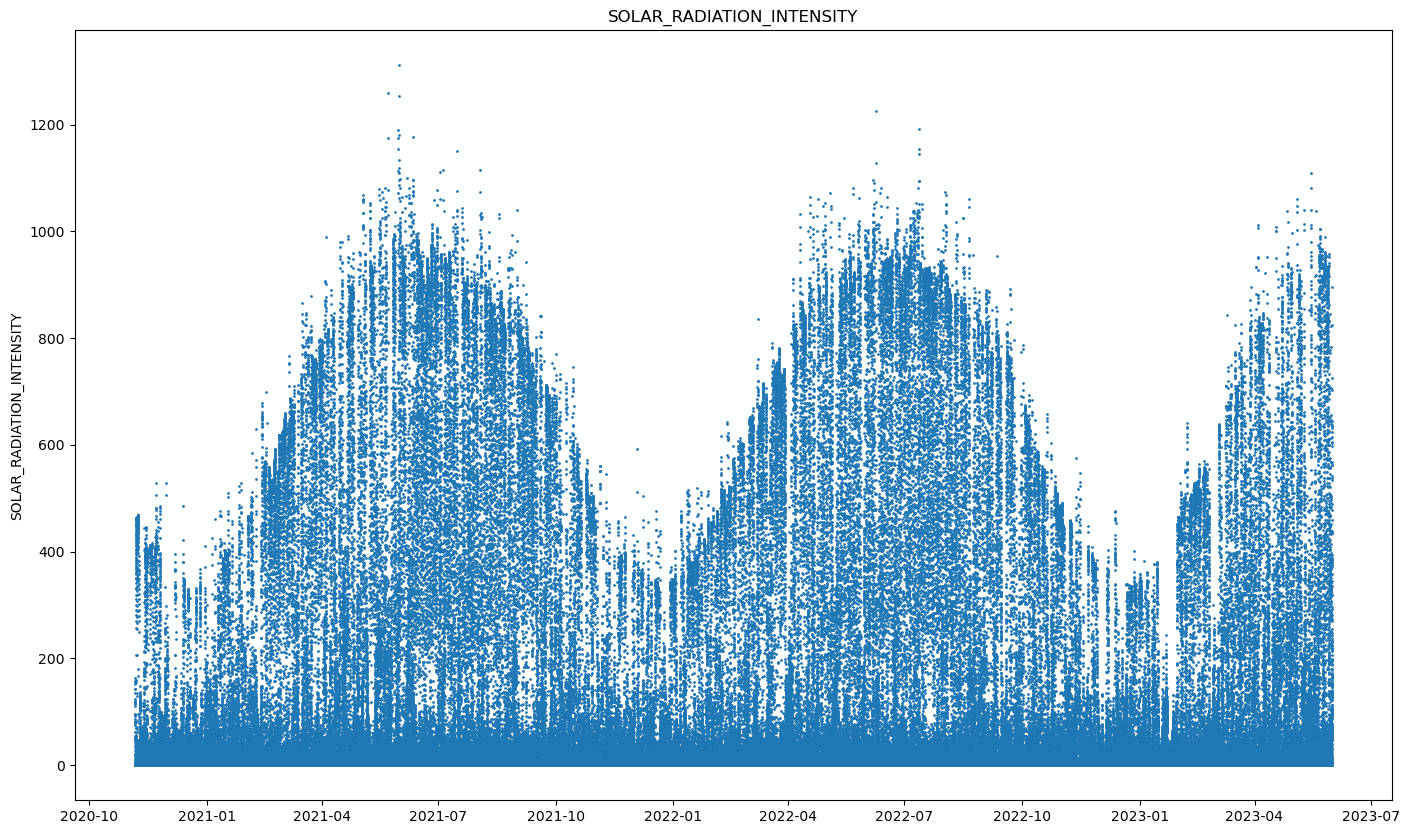

In [6]:
# plot 'SOLAR_RADIATION_INTENSITY'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(solar_radiation_intensity_all.index, solar_radiation_intensity_all['SOLAR_RADIATION_INTENSITY'],s=1)
ax.set_ylabel('SOLAR_RADIATION_INTENSITY')  
ax.set_title('SOLAR_RADIATION_INTENSITY')  
plt.show()

                           SOLAR_RADIATION_INTENSITY
2020-11-05 12:00:00+00:00                 126.588889
2020-11-05 13:00:00+00:00                 112.591667
2020-11-05 14:00:00+00:00                  52.650000
2020-11-05 15:00:00+00:00                  10.508333
2020-11-05 16:00:00+00:00                   0.000000
...                                              ...
2023-05-31 17:00:00+00:00                  44.766667
2023-05-31 18:00:00+00:00                   6.050000
2023-05-31 19:00:00+00:00                   0.000000
2023-05-31 20:00:00+00:00                   0.000000
2023-05-31 21:00:00+00:00                   0.000000

[22498 rows x 1 columns]


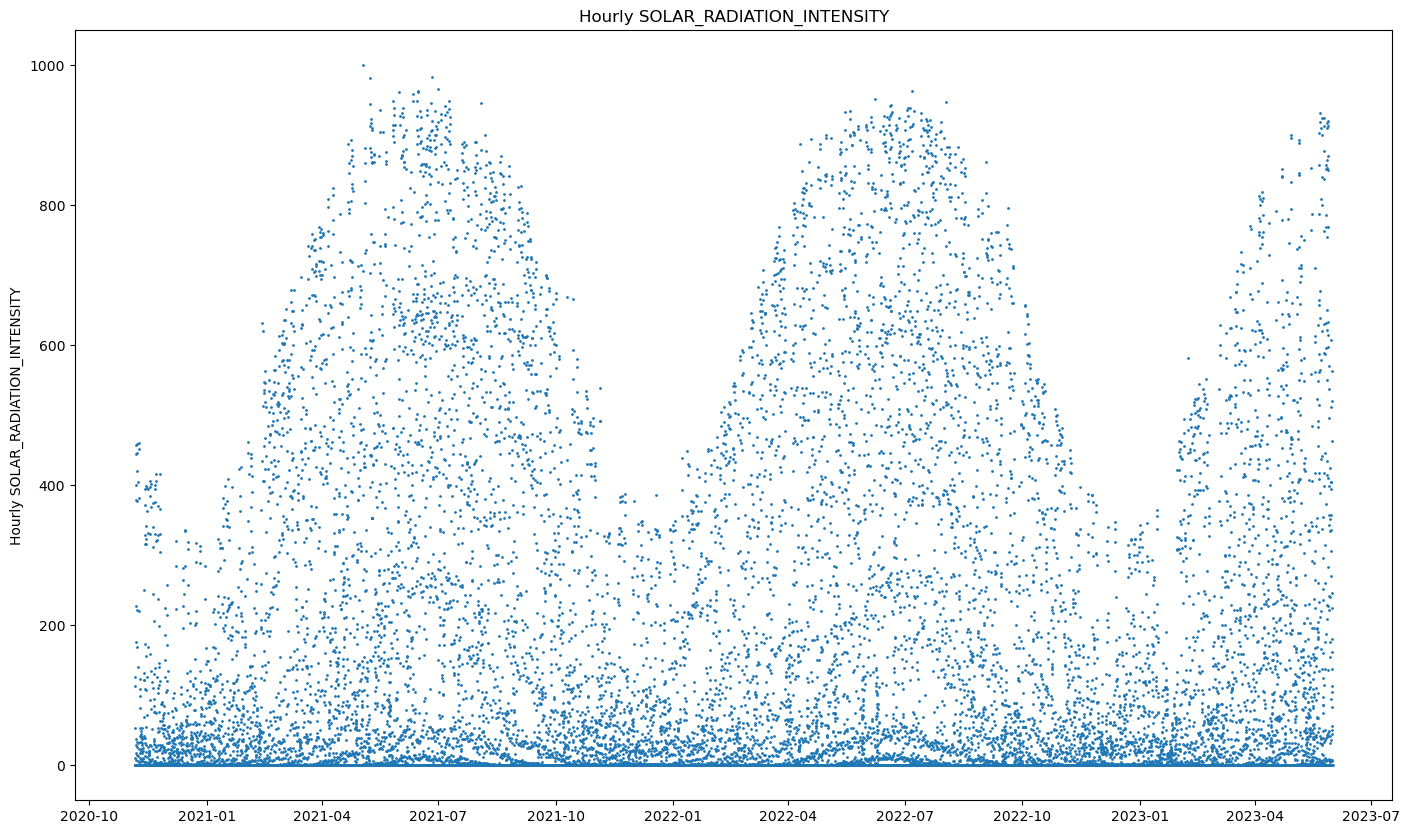

In [7]:
# hourly data
# sum the values for each hour and take the mean

str(solar_radiation_intensity_all.index.dtype) # okay
solar_radiation_intensity_hourly = solar_radiation_intensity_all.resample('H').mean()
print(solar_radiation_intensity_hourly)

# plot hourly 'AMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(solar_radiation_intensity_hourly.index, solar_radiation_intensity_hourly['SOLAR_RADIATION_INTENSITY'],s=1)
ax.set_ylabel('Hourly SOLAR_RADIATION_INTENSITY')  
ax.set_title('Hourly SOLAR_RADIATION_INTENSITY')  
plt.show()

In [8]:
# fit the old models to the new data 

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define both fits
order_1=(3,1,2)
order_2=(2,1,4)


                                   SARIMAX Results                                   
Dep. Variable:     SOLAR_RADIATION_INTENSITY   No. Observations:                22498
Model:                        ARIMA(3, 1, 2)   Log Likelihood             -128780.464
Date:                       Wed, 22 May 2024   AIC                         257572.927
Time:                               03:48:25   BIC                         257621.054
Sample:                           11-05-2020   HQIC                        257588.584
                                - 05-31-2023                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0523      0.005    398.352      0.000       2.042       2.062
ar.L2         -1.2917      0.009   -143.629      0.000      -1.309      -1.

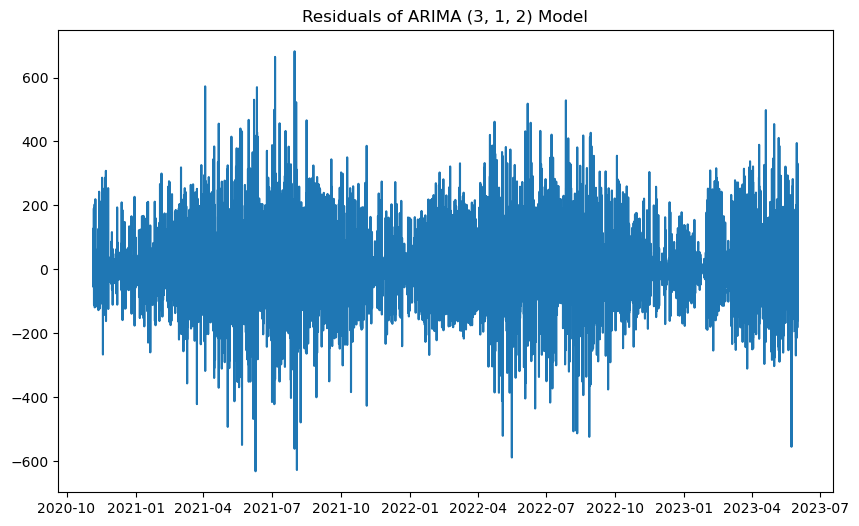

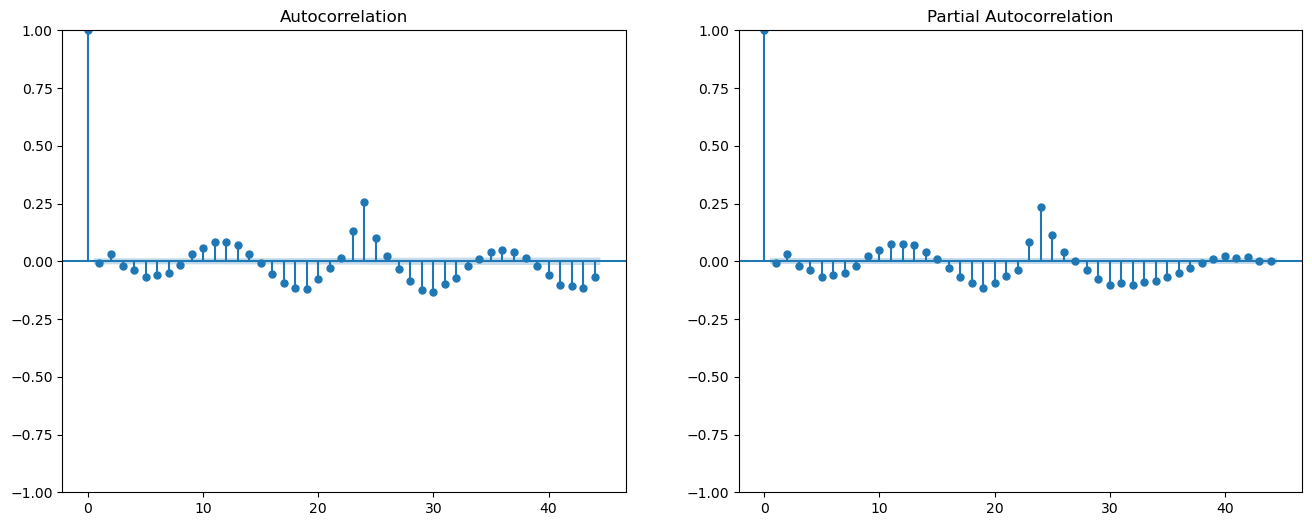

In [9]:
# fit the model number 1
best_model_1 = ARIMA(solar_radiation_intensity_hourly, order=order_1)   # change order accordingly
best_fit_1 = best_model_1.fit()

# summary of the best model
print(best_fit_1.summary())

# residuals of the best model
residuals_best_1 = best_fit_1.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_1)
plt.title(f'Residuals of ARIMA {order_1} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_1, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_1, ax=ax[1], alpha=0.05)
plt.show()

                                   SARIMAX Results                                   
Dep. Variable:     SOLAR_RADIATION_INTENSITY   No. Observations:                22498
Model:                        ARIMA(2, 1, 4)   Log Likelihood             -128765.814
Date:                       Wed, 22 May 2024   AIC                         257545.628
Time:                               03:48:39   BIC                         257601.776
Sample:                           11-05-2020   HQIC                        257563.894
                                - 05-31-2023                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8490      0.002    811.343      0.000       1.845       1.854
ar.L2         -0.9185      0.002   -389.865      0.000      -0.923      -0.

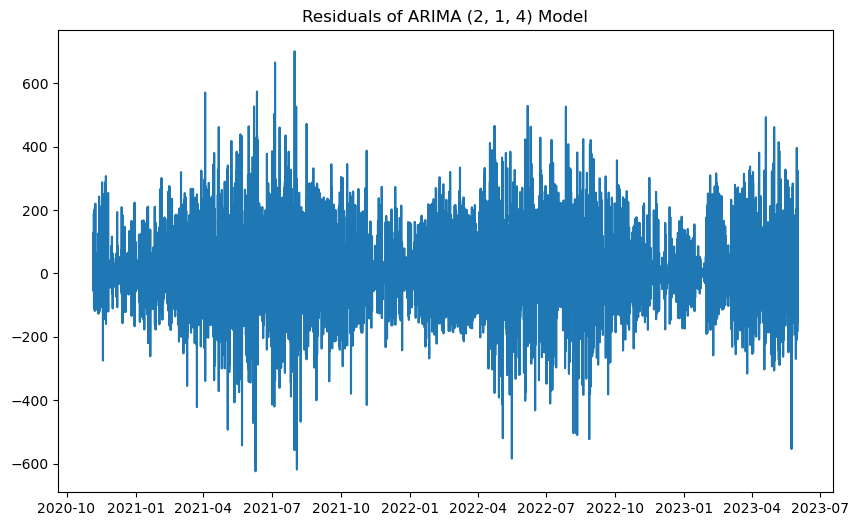

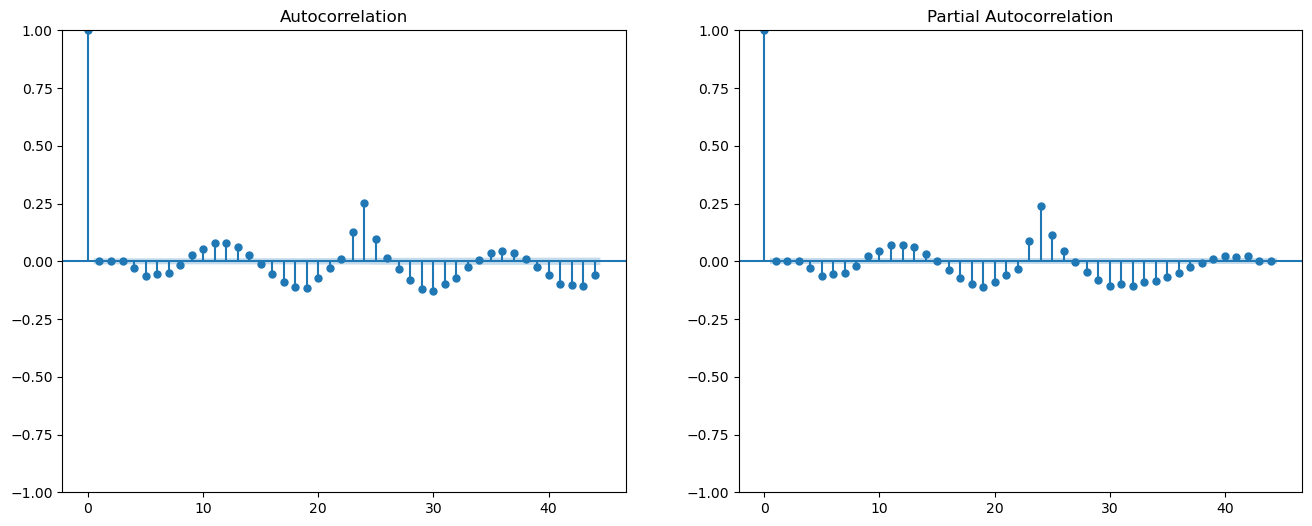

In [10]:
# fit the model number 2
best_model_2 = ARIMA(solar_radiation_intensity_hourly, order=order_2)   # change order accordingly
best_fit_2 = best_model_2.fit()

# summary of the best model
print(best_fit_2.summary())

# residuals of the best model
residuals_best_2 = best_fit_2.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_2)
plt.title(f'Residuals of ARIMA {order_2} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_2, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_2, ax=ax[1], alpha=0.05)
plt.show()

In [11]:
# data for 2020, 2021, 2022
# fit the best model to this data
# 2 best ARIMAs: (3,1,2) and (2,1,4) - try both
# forecast the next 24 hours 
# compare forecast from ARIMA and simple model with actual values (maybe 2 simple models)
# plot forecasts, plot errors

solar_radiation_intensity_20_21_22 = solar_radiation_intensity_hourly.loc[(solar_radiation_intensity_hourly.index.year == 2020) | (solar_radiation_intensity_hourly.index.year == 2021) | (solar_radiation_intensity_hourly.index.year == 2022) , 'SOLAR_RADIATION_INTENSITY']
print(solar_radiation_intensity_20_21_22)

2020-11-05 12:00:00+00:00    126.588889
2020-11-05 13:00:00+00:00    112.591667
2020-11-05 14:00:00+00:00     52.650000
2020-11-05 15:00:00+00:00     10.508333
2020-11-05 16:00:00+00:00      0.000000
                                ...    
2022-12-31 19:00:00+00:00      0.000000
2022-12-31 20:00:00+00:00      0.000000
2022-12-31 21:00:00+00:00      0.000000
2022-12-31 22:00:00+00:00      0.000000
2022-12-31 23:00:00+00:00      0.000000
Freq: H, Name: SOLAR_RADIATION_INTENSITY, Length: 18876, dtype: float64


In [12]:
# 1st simple model
# average of the previous 3 days is the value for the next day

def last_3_days_average(data, forecasted_steps):
    # Forecasts the next values based on the average of the last 3 days at the same time.
    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1) # finds out the next time step
        
        last_3_days = [
            next_time_step - pd.Timedelta(days=i) for i in range(1, 4)     # gets the same hour from the last 3 days
        ]
        
        values = [data[data.index == dt].values for dt in last_3_days] # extracts the values at the same hour from the last 3 days
        values = [val[0] if len(val) > 0 else np.nan for val in values]
        
        forecast_value = np.nanmean(values) # mean of the last 3 days
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])]) # adds the forecasted value to the data for the next iteration

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

last_3_days_average(solar_radiation_intensity_20_21_22, 24)

last_3_solar_radiation_intensity = last_3_days_average(solar_radiation_intensity_20_21_22, 24)

In [13]:
# 2nd simple model
# today's measurement is tomorrow's forecast

def today_is_tomorrow(data, forecasted_steps):

    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1)
        
        same_hour_last_day = next_time_step - pd.Timedelta(days=1)
        
        forecast_value = data.loc[same_hour_last_day]
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])])

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

today_is_tomorrow(solar_radiation_intensity_20_21_22, 24)

today_is_tomorrow_solar_radiation_intensity = today_is_tomorrow(solar_radiation_intensity_20_21_22, 24)

ARIMA(2,1,4) is preferred based on AIC.

In [14]:
# ARIMA(2,1,4) (2nd fit)

# change p,d,q to the best found

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# fit
model_214 = ARIMA(solar_radiation_intensity_20_21_22, order=(2,1,4))
fit_214 = model_214.fit()

# summary of the fit
print(fit_214.summary())

# ARIMA forecast for 1 day (24 steps) into the future

forecast_result_214 = fit_214.get_forecast(steps=24)
forecast_values_214 = forecast_result_214.predicted_mean
conf_int_214 = forecast_result_214.conf_int()

print("Forecasted values:", forecast_values_214)
print("95% Confidence intervals of forecasts:", conf_int_214)

                                   SARIMAX Results                                   
Dep. Variable:     SOLAR_RADIATION_INTENSITY   No. Observations:                18876
Model:                        ARIMA(2, 1, 4)   Log Likelihood             -108280.113
Date:                       Wed, 22 May 2024   AIC                         216574.226
Time:                               03:48:51   BIC                         216629.145
Sample:                           11-05-2020   HQIC                        216592.244
                                - 12-31-2022                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8564      0.002    776.051      0.000       1.852       1.861
ar.L2         -0.9262      0.002   -375.266      0.000      -0.931      -0.

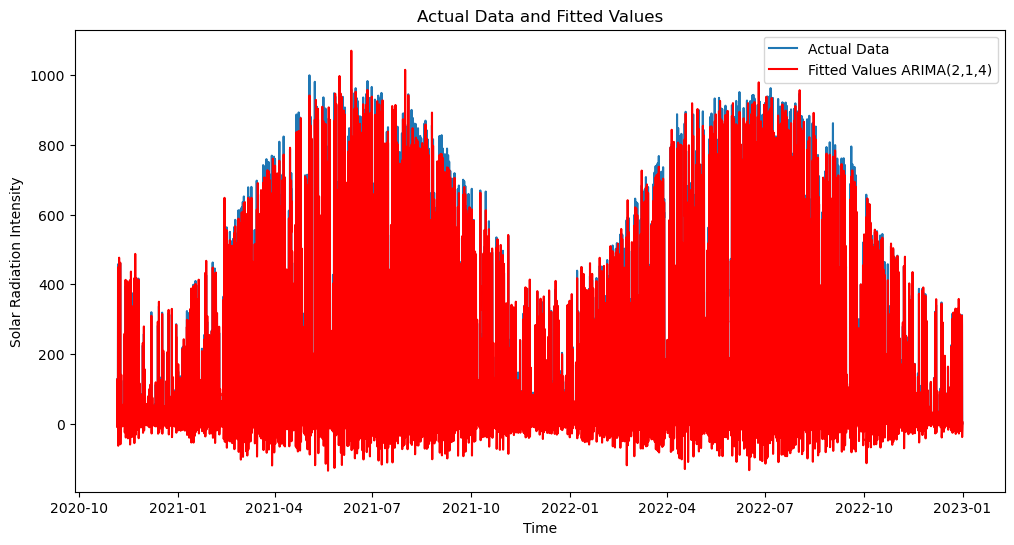

In [15]:
# plot actual data and fitted values - 2ND ARIMA
# change p,d,q to the best found

# fitted values
fitted_values_214 = fit_214.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(solar_radiation_intensity_20_21_22.index, solar_radiation_intensity_20_21_22, label='Actual Data')
plt.plot(solar_radiation_intensity_20_21_22.index, fitted_values_214, color='red', label='Fitted Values ARIMA(2,1,4)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Solar Radiation Intensity')
plt.title('Actual Data and Fitted Values')
plt.show()

# this looks too good

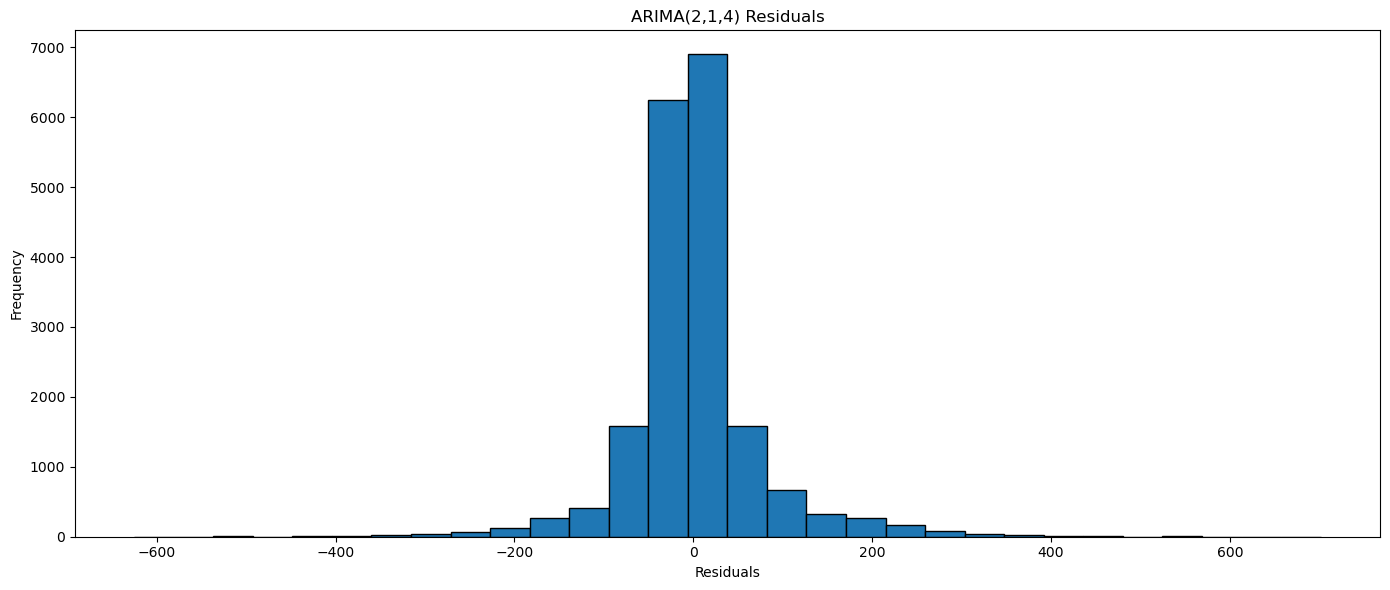

In [16]:
# comparison of the histograms

# residuals

residuals_214 = fit_214.resid

plt.figure(figsize=(14, 6))
plt.hist(residuals_214, bins=30, edgecolor='k')
plt.title('ARIMA(2,1,4) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()


In [17]:
# statistical test and metricts to determine which model is better

import math 
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# mean of the residuals (should be 0)

mean2 = np.mean(residuals_214)
#print(mean1, mean2)

# AIC (already done above) - writte about AIC in the report

aic2 = fit_214.aic
#print(aic1, aic2)


# Ljung-Box test for autocorrelation - see model fit output

# BIC - see model fit output

Mean Absolute Error: 44.529795356967554
Mean Squared Error: 5627.733237910002


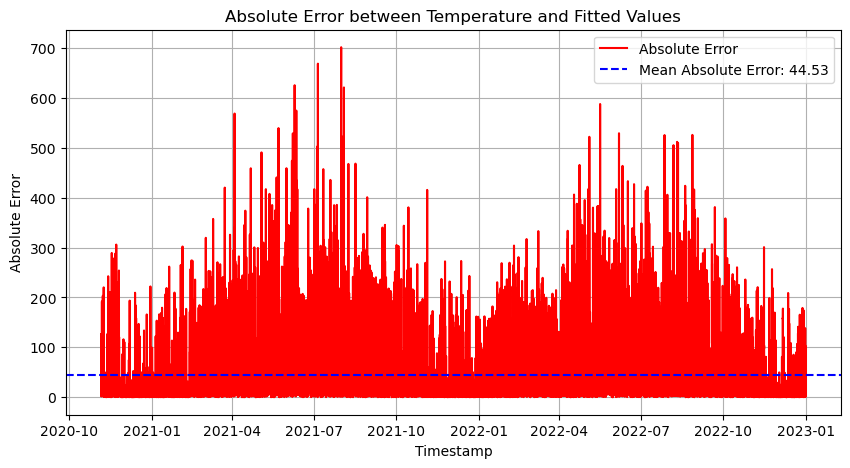

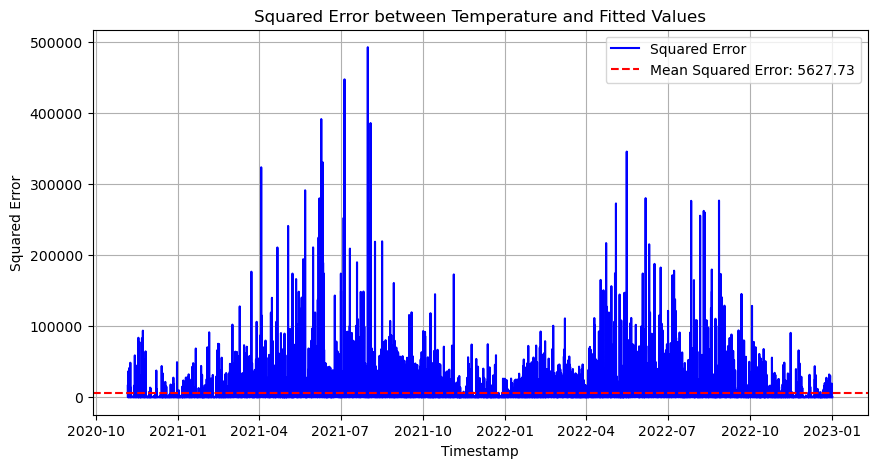

In [18]:
# Absolute error measurements

# absolute error comparison - actual data vs fitted model data

def calculate_errors(data, model): 
      # model are fitted values of a chosen model
  if isinstance(data, pd.Series) and isinstance(model, pd.Series):
        absolute_error = (data - model).abs()
        squared_error = (data - model) ** 2
  elif isinstance(data, np.ndarray) and isinstance(model, np.ndarray):
        absolute_error = np.abs(data - model)
        squared_error = (data - model) ** 2
  errors = pd.DataFrame({
        'absolute_error': absolute_error,
        'squared_error': squared_error
  })

  return errors

# (2,1,4) is the preferred, lets compare this data with actual data
# actual data - temperature_20_21_22
# fitted values data - fitted_values_214 

errors = calculate_errors(solar_radiation_intensity_20_21_22, fitted_values_214 )

# mean errors
mean_absolute_error = errors['absolute_error'].mean()
mean_squared_error = errors['squared_error'].mean()
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

# plot of the absolute error
plt.figure(figsize=(10, 5))
plt.plot(errors['absolute_error'], label='Absolute Error', color='red')
plt.axhline(y=mean_absolute_error, color='blue', linestyle='--', label=f'Mean Absolute Error: {mean_absolute_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Absolute Error')
plt.title('Absolute Error between Temperature and Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

# plot of the squared error
plt.figure(figsize=(10, 5))
plt.plot(errors['squared_error'], label='Squared Error', color='blue')
plt.axhline(y=mean_squared_error, color='red', linestyle='--', label=f'Mean Squared Error: {mean_squared_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Squared Error')
plt.title('Squared Error between Temperature and Fitted Values')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    

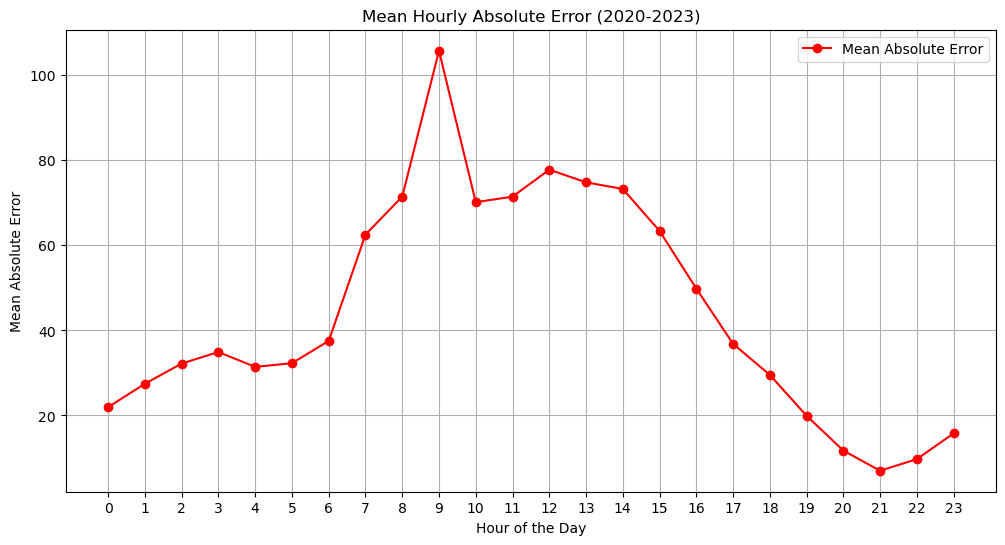

Hour
0      21.963572
1      27.470036
2      32.209057
3      34.924233
4      31.421142
5      32.301454
6      37.529175
7      62.525545
8      71.443441
9     105.746018
10     70.139735
11     71.440037
12     77.780260
13     74.814987
14     73.244235
15     63.385560
16     49.828642
17     36.841345
18     29.536979
19     19.937708
20     11.746420
21      7.018153
22      9.747034
23     15.802603
Name: absolute_error, dtype: float64


In [19]:
# mean hourly absolute errors

errors['Hour'] = errors.index.hour

# mean
mean_absolute_errors_by_hour = errors.groupby('Hour')['absolute_error'].mean()

# plot
plt.figure(figsize=(12, 6))
plt.plot(mean_absolute_errors_by_hour.index, mean_absolute_errors_by_hour, label='Mean Absolute Error', marker='o', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Hourly Absolute Error (2020-2023)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(range(24))
plt.show()

print(mean_absolute_errors_by_hour)

In [20]:
# actual measurements for 1 day (24 steps) into the future
radio_hourly = solar_radiation_intensity_hourly['SOLAR_RADIATION_INTENSITY']
actual_values_solar_radiation_intensity_23 = radio_hourly['2023'].head(24)
print(actual_values_solar_radiation_intensity_23)

2023-01-01 00:00:00+00:00      0.000000
2023-01-01 01:00:00+00:00      0.000000
2023-01-01 02:00:00+00:00      0.000000
2023-01-01 03:00:00+00:00      0.000000
2023-01-01 04:00:00+00:00      0.000000
2023-01-01 05:00:00+00:00      0.000000
2023-01-01 06:00:00+00:00      1.383333
2023-01-01 07:00:00+00:00     19.966667
2023-01-01 08:00:00+00:00     39.075000
2023-01-01 09:00:00+00:00    199.008333
2023-01-01 10:00:00+00:00    323.758333
2023-01-01 11:00:00+00:00    329.575000
2023-01-01 12:00:00+00:00    343.325000
2023-01-01 13:00:00+00:00    139.491667
2023-01-01 14:00:00+00:00     19.591667
2023-01-01 15:00:00+00:00      2.533333
2023-01-01 16:00:00+00:00      0.000000
2023-01-01 17:00:00+00:00      0.000000
2023-01-01 18:00:00+00:00      0.000000
2023-01-01 19:00:00+00:00      0.000000
2023-01-01 20:00:00+00:00      0.000000
2023-01-01 21:00:00+00:00      0.000000
2023-01-01 22:00:00+00:00      0.000000
2023-01-01 23:00:00+00:00      0.000000
Freq: H, Name: SOLAR_RADIATION_INTENSITY

                               Actual  ARIMA(2,1,4)  \
2023-01-01 00:00:00+00:00    0.000000      7.399330   
2023-01-01 01:00:00+00:00    0.000000     19.260551   
2023-01-01 02:00:00+00:00    0.000000     34.359505   
2023-01-01 03:00:00+00:00    0.000000     51.155973   
2023-01-01 04:00:00+00:00    0.000000     68.352343   
2023-01-01 05:00:00+00:00    0.000000     84.718895   
2023-01-01 06:00:00+00:00    1.383333     99.174616   
2023-01-01 07:00:00+00:00   19.966667    110.851672   
2023-01-01 08:00:00+00:00   39.075000    119.140233   
2023-01-01 09:00:00+00:00  199.008333    123.711990   
2023-01-01 10:00:00+00:00  323.758333    124.522281   
2023-01-01 11:00:00+00:00  329.575000    121.792267   
2023-01-01 12:00:00+00:00  343.325000    115.973874   
2023-01-01 13:00:00+00:00  139.491667    107.701205   
2023-01-01 14:00:00+00:00   19.591667     97.732843   
2023-01-01 15:00:00+00:00    2.533333     86.889709   
2023-01-01 16:00:00+00:00    0.000000     75.993169   
2023-01-01

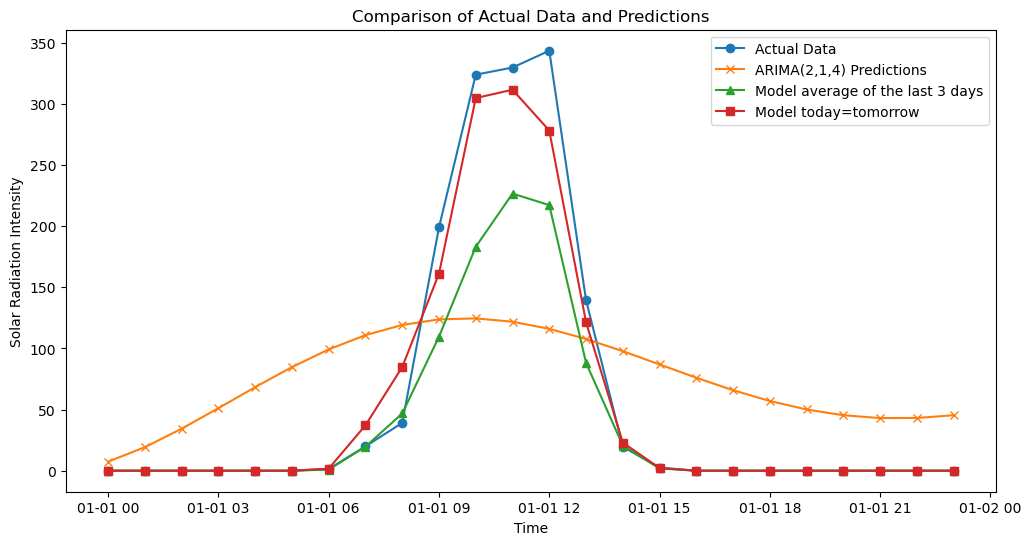

In [21]:
# comparing the models with the actual data
# change p,d,q to the best found

comparison_solar_radiation_intensity = pd.DataFrame({
    'Actual': actual_values_solar_radiation_intensity_23,
    'ARIMA(2,1,4)': forecast_values_214,
    'Model average of the last 3 days': last_3_solar_radiation_intensity,
    'Model today=tomorrow': today_is_tomorrow_solar_radiation_intensity
})

print(comparison_solar_radiation_intensity)

plt.figure(figsize=(12,6))

plt.plot(comparison_solar_radiation_intensity.index, comparison_solar_radiation_intensity['Actual'], label='Actual Data', marker='o')
plt.plot(comparison_solar_radiation_intensity.index, comparison_solar_radiation_intensity['ARIMA(2,1,4)'], label='ARIMA(2,1,4) Predictions', marker='x')
plt.plot(comparison_solar_radiation_intensity.index, comparison_solar_radiation_intensity['Model average of the last 3 days'], label='Model average of the last 3 days', marker='^')
plt.plot(comparison_solar_radiation_intensity.index, comparison_solar_radiation_intensity['Model today=tomorrow'], label='Model today=tomorrow', marker='s')

plt.xlabel('Time')
plt.ylabel('Solar Radiation Intensity')
plt.title('Comparison of Actual Data and Predictions')
plt.legend()
plt.show()

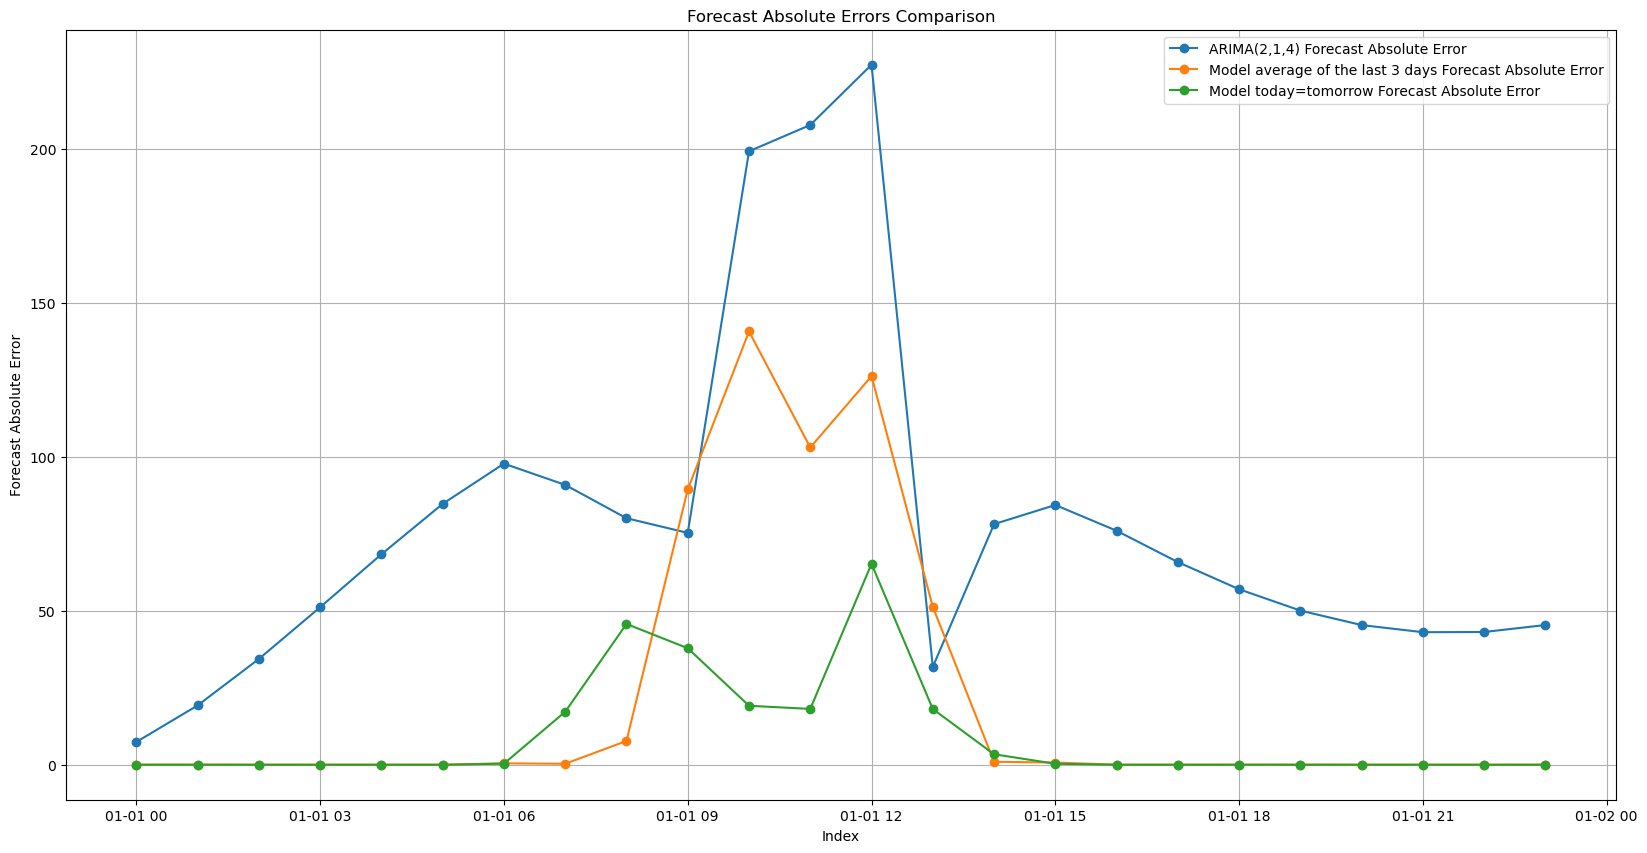

ARIMA(2,1,4) Forecast Absolute Error                        77.652954
Model average of the last 3 days Forecast Absolute Error    21.699653
Model today=tomorrow Forecast Absolute Error                 9.393403
dtype: float64


In [22]:
# 4 models' predictions compared to the actual data

# absolute errors of all the modela
forecast_absolute_errors = pd.DataFrame()
for column in comparison_solar_radiation_intensity.columns:
    if column != 'Actual':
        forecast_absolute_errors[column + ' Forecast Absolute Error'] = (comparison_solar_radiation_intensity['Actual'] - comparison_solar_radiation_intensity[column]).abs()

# plot
plt.figure(figsize=(20, 10))
for column in forecast_absolute_errors.columns:
    plt.plot(forecast_absolute_errors[column], label=column, marker='o')

plt.xlabel('Index')
plt.ylabel('Forecast Absolute Error')
plt.title('Forecast Absolute Errors Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# values 
#print(forecast_absolute_errors)

# mean errors
print(forecast_absolute_errors.mean())
